<a href="https://colab.research.google.com/github/Asal-Sanei/MachineLearning2025/blob/main/Mini%20Project%202/MP2_Question2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 107dHB_HzOj7ADKqauPfBfuq9VD2VFig2
#https://drive.google.com/file/d/107dHB_HzOj7ADKqauPfBfuq9VD2VFig2/view?usp=sharing
!gdown 1j96pnwsOuXex3gciUOGKuTdrgxjyVmYO
#https://drive.google.com/file/d/1j96pnwsOuXex3gciUOGKuTdrgxjyVmYO/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=107dHB_HzOj7ADKqauPfBfuq9VD2VFig2
To: /content/mnist_test.csv
100% 18.3M/18.3M [00:00<00:00, 57.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1j96pnwsOuXex3gciUOGKuTdrgxjyVmYO
From (redirected): https://drive.google.com/uc?id=1j96pnwsOuXex3gciUOGKuTdrgxjyVmYO&confirm=t&uuid=039a462a-3c71-4451-836e-802eb220fc37
To: /content/mnist_train.csv
100% 110M/110M [00:01<00:00, 67.8MB/s] 


#CSV files

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/mnist_train.csv')
df2=pd.read_csv('/content/mnist_test.csv')

##Combining files

#3.1

In [ ]:
df = pd.concat([df1, df2])
print(df)
df.shape

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         5    0    0    0    0    0    0    0    0    0  ...      0      0   
1         0    0    0    0    0    0    0    0    0    0  ...      0      0   
2         4    0    0    0    0    0    0    0    0    0  ...      0      0   
3         1    0    0    0    0    0    0    0    0    0  ...      0      0   
4         9    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

(70000, 785)

#Preprocessing

#Deviding 10000 samples

In [ ]:
df = df.iloc[:10000]
print(f"Shape of the first 10,000 samples: {df.shape}")
print(df)

Shape of the first 10,000 samples: (10000, 785)
      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         5    0    0    0    0    0    0    0    0    0  ...      0      0   
1         0    0    0    0    0    0    0    0    0    0  ...      0      0   
2         4    0    0    0    0    0    0    0    0    0  ...      0      0   
3         1    0    0    0    0    0    0    0    0    0  ...      0      0   
4         9    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      8    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      6    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      9    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      7    0    0    0    0    0    0    0    0    0  ...      0      0   

   

#Normalization

##Min Max Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:

X = df.drop('label', axis=1)
y = df['label']

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

scaled_df['label'] = y

#3.2

#Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X=scaled_df.drop('label',axis=1)
y=scaled_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

#3.3

#KNN

##K=[3,5,9]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
k_values = [3, 5, 9]
for k in  k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with K={k}: {accuracy:.4f}")

Accuracy with K=3: 0.9443
Accuracy with K=5: 0.9417
Accuracy with K=9: 0.9383


##K from 1 to 25

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accuracy_scores = []
k_range = range(1, 26, 2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Accuracy with K={k}: {accuracy:.4f}")

best_accuracy = max(accuracy_scores)
best_k_index = accuracy_scores.index(best_accuracy)
best_k = k_range[best_k_index]



Accuracy with K=1: 0.9453
Accuracy with K=3: 0.9443
Accuracy with K=5: 0.9417
Accuracy with K=7: 0.9390
Accuracy with K=9: 0.9383
Accuracy with K=11: 0.9337
Accuracy with K=13: 0.9323
Accuracy with K=15: 0.9317
Accuracy with K=17: 0.9300
Accuracy with K=19: 0.9277
Accuracy with K=21: 0.9230
Accuracy with K=23: 0.9223
Accuracy with K=25: 0.9203


#Visualizing effect of 'k'

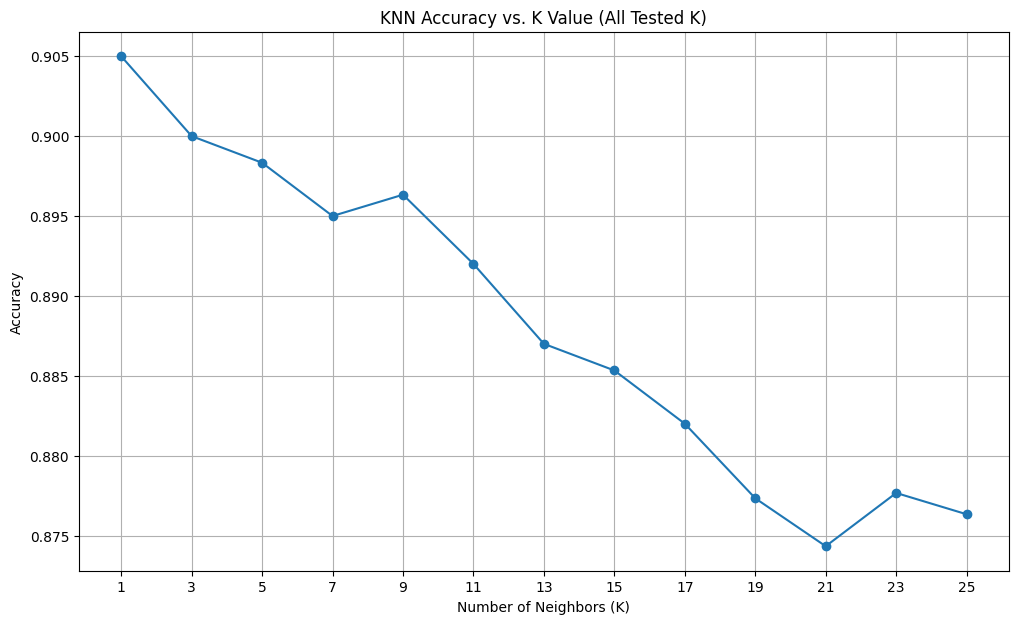

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. K Value (All Tested K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

X_pca = pca.fit_transform(X)
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")

Original number of features: 784
Reduced number of features: 20


In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=34)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pca = KNeighborsClassifier(n_neighbors=9)
knn_pca.fit(x_train_pca,y_train)
knn_pca.score(x_test_pca, y_test)

0.915

In [ ]:
pred_pca = knn_pca.predict(x_test_pca)
pred_pca

array([4, 8, 1, ..., 5, 8, 0])

#Accuracy vs Number Of PCA components





Accuracy with 20 PCA components: 0.9413
Accuracy with 40 PCA components: 0.9470
Accuracy with 60 PCA components: 0.9473
Accuracy with 80 PCA components: 0.9447
Accuracy with 100 PCA components: 0.9427


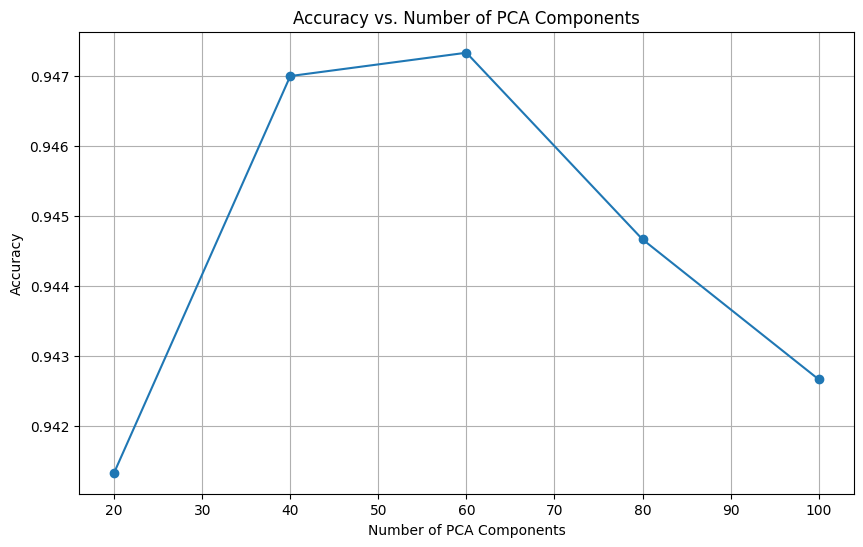

In [ ]:
accuracy_scores_pca = []
for n_components in range(20, 101, 20):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=34)
    knn_pca = KNeighborsClassifier(n_neighbors=9)
    knn_pca.fit(x_train_pca, y_train)
    accuracy = knn_pca.score(x_test_pca, y_test)
    accuracy_scores_pca.append(accuracy)
    print(f"Accuracy with {n_components} PCA components: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(20, 101, 20), accuracy_scores_pca, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
